In [1]:
import numpy as np
import nibabel as nib
import pandas as pd

In [3]:
from nilearn import datasets

rest_dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filenames = rest_dataset.func
confounds = rest_dataset.confounds

Matplotlib is building the font cache; this may take a moment.
/opt/conda/lib/python3.9/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/conda/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/opt/conda/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


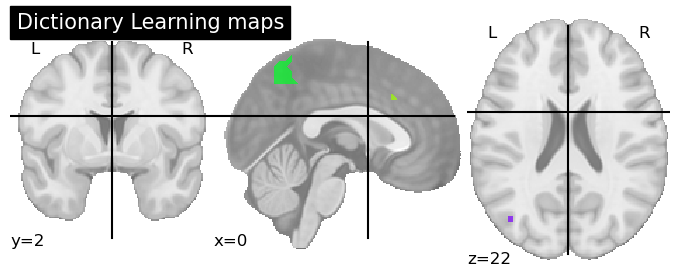

In [4]:
from nilearn.decomposition import DictLearning

# Initialize DictLearning object
dict_learn = DictLearning(n_components=8, smoothing_fwhm=6.0, memory="nilearn_cache", memory_level=2,random_state=0)
# Fit to the data
dict_learn.fit(func_filenames)
# Resting state networks/maps in attribute `components_img_`
components_img = dict_learn.components_img_

# Visualization of functional networks
# Show networks using plotting utilities
from nilearn import plotting

plotting.plot_prob_atlas(components_img, view_type="filled_contours", title="Dictionary Learning maps", view_type='auto', threshold='auto', linewidths=2.5, cut_coords=None, output_file=None, display_mode='ortho', figure=None, axes=None, title=None, annotate=True, draw_cross=True, black_bg='auto', dim='auto', colorbar=False)